# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.648004e+01     1.276572e+01
 * time: 0.0013339519500732422
     1     3.628397e+01     1.093109e+01
 * time: 0.003962039947509766
     2     2.442890e+01     4.125637e+00
 * time: 0.010101079940795898
     3     2.105508e+01     1.576304e+00
 * time: 0.015558958053588867
     4     1.974319e+01     2.208797e+00
 * time: 0.020524024963378906
     5     1.938747e+01     3.653830e+00
 * time: 0.024924039840698242
     6     1.881917e+01     1.893682e+00
 * time: 0.030256032943725586
     7     1.814850e+01     1.673874e+00
 * time: 0.034487009048461914
     8     1.776630e+01     1.178327e+00
 * time: 0.03900408744812012
     9     1.759234e+01     9.016873e-01
 * time: 0.04336094856262207
    10     1.747654e+01     5.608436e-01
 * time: 0.04757809638977051
    11     1.746035e+01     1.294989e+00
 * time: 0.05086708068847656
    12     1.737958e+01     1.022693e+00
 * time: 0.05427694320678711
    13     1.737009e+01     1.257254e+00

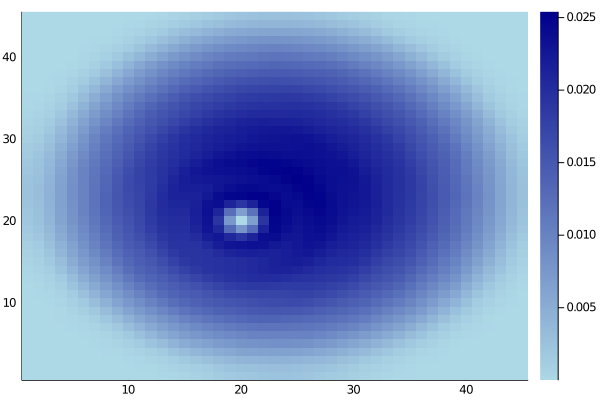

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)